In [4]:
import pandas as pd

In [5]:
from nltk.stem.porter import PorterStemmer

In [6]:
import nltk

In [7]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [10]:
df=pd.read_csv('/content/Restaurant_Reviews 1.tsv',delimiter='\t',quoting=3)

In [ ]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [11]:
df.tail()

,Review,Liked
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0
999,"Then, as if I hadn't wasted enough of my life ...",0


In [12]:
df.shape

(1000, 2)

In [13]:
df["Review"][616]

'My friend did not like his Bloody Mary.'

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [15]:
df.columns

Index(['Review', 'Liked'], dtype='object')

In [16]:
import re

In [17]:
import string
import re

In [19]:
corpus=[]
for i in range(0,1000):
  review=re.sub(pattern='[^a-zA-Z]',repl=' ',string=df['Review'][i])
  review=review.lower()
  review_word=review.split()
  #print(review_word)
  review_word=[word for word in review_word if not word in set(stopwords.words('english'))]
  porterstemmer=PorterStemmer()
  review1=[porterstemmer.stem(word) for word in review_word]
  review=''.join(review1)
  corpus.append(review1)

In [20]:
set(stopwords.words('english'))

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [22]:
corpus[:1000]

[['wow', 'love', 'place'],
 ['crust', 'good'],
 ['tasti', 'textur', 'nasti'],
 ['stop',
  'late',
  'may',
  'bank',
  'holiday',
  'rick',
  'steve',
  'recommend',
  'love'],
 ['select', 'menu', 'great', 'price'],
 ['get', 'angri', 'want', 'damn', 'pho'],
 ['honeslti', 'tast', 'fresh'],
 ['potato',
  'like',
  'rubber',
  'could',
  'tell',
  'made',
  'ahead',
  'time',
  'kept',
  'warmer'],
 ['fri', 'great'],
 ['great', 'touch'],
 ['servic', 'prompt'],
 ['would', 'go', 'back'],
 ['cashier', 'care', 'ever', 'say', 'still', 'end', 'wayyy', 'overpr'],
 ['tri', 'cape', 'cod', 'ravoli', 'chicken', 'cranberri', 'mmmm'],
 ['disgust', 'pretti', 'sure', 'human', 'hair'],
 ['shock', 'sign', 'indic', 'cash'],
 ['highli', 'recommend'],
 ['waitress', 'littl', 'slow', 'servic'],
 ['place', 'worth', 'time', 'let', 'alon', 'vega'],
 ['like'],
 ['burritto', 'blah'],
 ['food', 'amaz'],
 ['servic', 'also', 'cute'],
 ['could', 'care', 'less', 'interior', 'beauti'],
 ['perform'],
 ['right', 'red', 've

In [23]:
df.shape

(1000, 2)

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=1500)

In [25]:
df["Review"]

,Review
0,Wow... Loved this place.
1,Crust is not good.
2,Not tasty and the texture was just nasty.
3,Stopped by during the late May bank holiday of...
4,The selection on the menu was great and so wer...
...,...
995,I think food should have flavor and texture an...
996,Appetite instantly gone.
997,Overall I was not impressed and would not go b...
998,"The whole experience was underwhelming, and I ..."


In [26]:
X = cv.fit_transform([' '.join(doc) for doc in corpus]).toarray()

In [27]:
X.shape

(1000, 1500)

In [28]:
X[0]

array([0, 0, 0, ..., 0, 0, 0])

In [29]:
X[0].max()

1

In [30]:
y=df.iloc[:,-1].values

In [31]:
y.shape

(1000,)

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test,y_train, y_test = train_test_split(X,y ,random_state=104,test_size=0.2)

In [34]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [35]:
c1f1= GaussianNB()
c1f2= MultinomialNB()
c1f3= BernoulliNB()

In [36]:
c1f1.fit(X_train,y_train)
c1f2.fit(X_train,y_train)
c1f3.fit(X_train,y_train)

BernoulliNB()

In [37]:
y_predictGaussian=c1f1.predict(X_test)
y_predictMultinomial=c1f2.predict(X_test)
y_predictBernoulli=c1f3.predict(X_test)

In [38]:
from sklearn.metrics import accuracy_score

In [39]:
accuracy_score(y_test,y_predictGaussian)

0.665

In [40]:
accuracy_score(y_test,y_predictMultinomial)

0.785

In [41]:
accuracy_score(y_test,y_predictBernoulli)

0.785

In [42]:
print("GussianNaiveBayes Accuracy:",accuracy_score(y_test,y_predictGaussian))
print("MultinomialNaiveBayes Accuracy:",accuracy_score(y_test,y_predictMultinomial))
print("BernoulliNaiveBayes Accuracy:",accuracy_score(y_test,y_predictBernoulli))

GussianNaiveBayes Accuracy: 0.665
MultinomialNaiveBayes Accuracy: 0.785
BernoulliNaiveBayes Accuracy: 0.785


In [43]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(X_train,y_train)
y_predictxgb=xgb.predict(X_test)
accuracy_score(y_test,y_predictxgb)

0.75

In [44]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_predictrf=rf.predict(X_test)
accuracy_score(y_test,y_predictrf)

0.74

In [45]:
from sklearn.metrics import confusion_matrix

In [46]:
confusion_matrix(y_test,y_predictrf) # RandomForest

array([[92, 12],
       [40, 56]])

In [47]:
confusion_matrix(y_test,y_predictxgb) #XGB

array([[82, 22],
       [28, 68]])

In [48]:
print("GussianNaiveBayes Accuracy:",accuracy_score(y_test,y_predictGaussian))
print("MultinomialNaiveBayes Accuracy:",accuracy_score(y_test,y_predictMultinomial))
print("BernoulliNaiveBayes Accuracy:",accuracy_score(y_test,y_predictBernoulli))
print("RandomForest Accuracy:",accuracy_score(y_test,y_predictrf))
print("XGB Accuracy:",accuracy_score(y_test,y_predictxgb))

GussianNaiveBayes Accuracy: 0.665
MultinomialNaiveBayes Accuracy: 0.785
BernoulliNaiveBayes Accuracy: 0.785
RandomForest Accuracy: 0.74
XGB Accuracy: 0.75


In [49]:
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=1500)
X = tfidf.fit_transform([' '.join(doc) for doc in corpus]).toarray()
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)

SVM Accuracy: 0.745


In [57]:
print(df.tail(30))

                                                Review  Liked
970  I immediately said I wanted to talk to the man...      0
971                    The ambiance isn't much better.      0
972  Unfortunately, it only set us up for disapppoi...      0
973                              The food wasn't good.      0
974  Your servers suck, wait, correction, our serve...      0
975      What happened next was pretty....off putting.      0
976  too bad cause I know it's family owned, I real...      0
977               Overpriced for what you are getting.      0
978               I vomited in the bathroom mid lunch.      0
979  I kept looking at the time and it had soon bec...      0
980  I have been to very few places to eat that und...      0
981  We started with the tuna sashimi which was bro...      0
982                            Food was below average.      0
983  It sure does beat the nachos at the movies but...      0
984       All in all, Ha Long Bay was a bit of a flop.      0
985  The

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)
y_pred_logreg = logreg_model.predict(X_test)
accuracy_logreg= accuracy_score(y_test, y_pred_logreg)
print("Logistic Regression Accuracy:", accuracy_logreg)

Logistic Regression Accuracy: 0.77


In [51]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [52]:


# Create the deep learning model:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))  # Input layer
model.add(Dropout(0.2))  # Dropout for regularization
model.add(Dense(64, activation='relu'))  # Hidden layer
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))  # Output layer (sigmoid for binary classification)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [53]:

#  Compile the model:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#  Train the model:
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

#  Evaluate the model:
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: {}'.format(accuracy))

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.5219 - loss: 0.6922 - val_accuracy: 0.6750 - val_loss: 0.6760
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8273 - loss: 0.6397 - val_accuracy: 0.7650 - val_loss: 0.6237
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9199 - loss: 0.5134 - val_accuracy: 0.7750 - val_loss: 0.5133
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9507 - loss: 0.2848 - val_accuracy: 0.8050 - val_loss: 0.4531
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9628 - loss: 0.1476 - val_accuracy: 0.7800 - val_loss: 0.4571
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9879 - loss: 0.0823 - val_accuracy: 0.7900 - val_loss: 0.5195
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9884 - loss: 0.0524 - val_accuracy: 0.7850 - val_loss: 0.5742
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9830 - loss: 0.0462 - val_accuracy: 0.7750 - val_los

In [54]:
print("GussianNaiveBayes Accuracy:",accuracy_score(y_test,y_predictGaussian))
print("MultinomialNaiveBayes Accuracy:",accuracy_score(y_test,y_predictMultinomial))
print("BernoulliNaiveBayes Accuracy:",accuracy_score(y_test,y_predictBernoulli))
print("RandomForest Accuracy:",accuracy_score(y_test,y_predictrf))
print("XGB Accuracy:",accuracy_score(y_test,y_predictxgb))
print("SVM Accuracy:", accuracy_svm)
print("Logistic Regression Accuracy:", accuracy_logreg)
print('Deep Learning Accuracy: {}'.format(accuracy))

GussianNaiveBayes Accuracy: 0.665
MultinomialNaiveBayes Accuracy: 0.785
BernoulliNaiveBayes Accuracy: 0.785
RandomForest Accuracy: 0.74
XGB Accuracy: 0.75
SVM Accuracy: 0.745
Logistic Regression Accuracy: 0.77
Deep Learning Accuracy: 0.7599999904632568


In [55]:
''' Highest accuracies among all the algorithms

MultinomialNaiveBayes Accuracy: 0.785

BernoulliNaiveBayes Accuracy: 0.785

Logistic Regression Accuracy: 0.77

Deep Learning Accuracy: 0.76 '''

' Highest accuracies among all the algorithms\n\nMultinomialNaiveBayes Accuracy: 0.785\n\nBernoulliNaiveBayes Accuracy: 0.785\n\nLogistic Regression Accuracy: 0.77\n\nDeep Learning Accuracy: 0.76 '

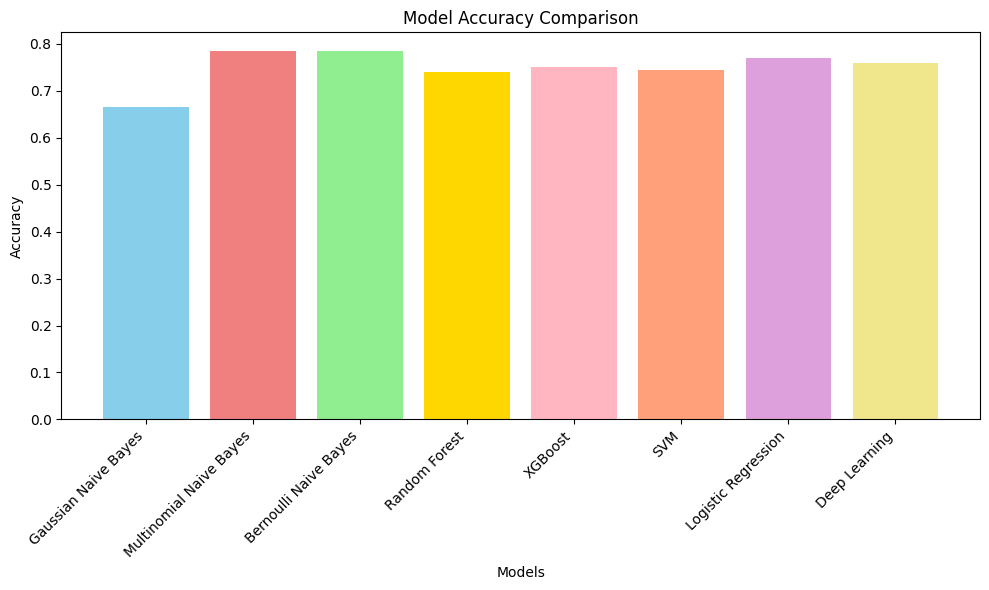

In [60]:
import matplotlib.pyplot as plt

accuracy_scores = {
    'Gaussian Naive Bayes': accuracy_score(y_test, y_predictGaussian),
    'Multinomial Naive Bayes': accuracy_score(y_test, y_predictMultinomial),
    'Bernoulli Naive Bayes': accuracy_score(y_test, y_predictBernoulli),
    'Random Forest': accuracy_score(y_test, y_predictrf),
    'XGBoost': accuracy_score(y_test, y_predictxgb),
    'SVM': accuracy_svm,
    'Logistic Regression': accuracy_logreg,
    'Deep Learning': accuracy
}


models = list(accuracy_scores.keys())
accuracies = list(accuracy_scores.values())
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['skyblue', 'lightcoral', 'lightgreen', 'gold', 'lightpink', 'lightsalmon', 'plum', 'khaki'])
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()